In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math
import random

In [3]:
def distance(a,b):
    t = 0
    for i in range(0,4):
        t = t + (a[i]-b[i])**2
    t = np.sqrt(t)
    return t

In [4]:
def create_random_centroid(x,k):
    a,b = np.shape(x)
    centroid = np.zeros(b*k)
    t = 0
    for i in range(0,k):
        for j in range(0,b):
            centroid[t] = random.uniform(x[:,j].min(),x[:,j].max())
            t = t + 1
    centroid = centroid.reshape(k,b)
    return centroid

In [5]:
def point_assign_to_cluster(x,centroid,k):
    m = x.shape[0]
    y_pred = np.zeros(m)
    #print(x[0])
    #print(centroid[0])
    for i in range(0,m):
        t = np.zeros(k)
        for j in range(0,k):
            t[j] = distance(x[i],centroid[j])
        minm = min(t)
        for j in range(0,k):
            if(minm == t[j]):
                y_pred[i] = j
    return y_pred

In [6]:
def update_cluster_centroid(x,y_pred,k):
    m,n = np.shape(x)
    centroid = np.zeros(n*k)
    for i in range(0,k):
        count = 0
        for j in range(0,m):
            if(y_pred[j] == i):
                for p in range(0,4):
                    centroid[i*n + p] += x[j,p]
                count += 1
        if(count == 0):
            for j in range(0,n):
                centroid[i*n + j] = 0
        else:
            for j in range(0,n):
                centroid[i*n + j] /= count
            #print(centroid[i*n + j])
    centroid = centroid.reshape(k,n)
    #print(centroid)
    return centroid

In [7]:
iris_ds= pd.read_csv('iris.data',header=None)
#iris = pd.DataFrame(data = iris)
#iris_ds
x = iris_ds.iloc[:,[0,1,2,3]].values
y = iris_ds.iloc[:, [4]].values
m,n = x.shape
for i in range(0,m):
    if(y[i] == 'Iris-setosa'):
        y[i] = 0
    elif(y[i] == 'Iris-versicolor'):
        y[i] = 1
    else:
        y[i] = 2

In [8]:
x_ = pd.DataFrame(x,  columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y_ = pd.DataFrame(y, columns=['Target'])
y_ = y_.astype(int)

In [20]:
itr = 40
m,n = x.shape
cost = np.zeros(10)
for k in range(1,10):
    centroid = create_random_centroid(x,k)
    #print(centroid)
    #print(y_pred)
    for i in range(0,itr):
        y_pred = point_assign_to_cluster(x,centroid,k)
        new_centroid = update_cluster_centroid(x,y_pred,k)
        if(np.array_equal(np.array(centroid), np.array(new_centroid))):
            break
        else:
            centroid = new_centroid
    y_pred = y_pred.astype(int)
    for i in range(0,m):
        cost[k] += distance(x[i],centroid[y_pred[i]])
print(cost)
#print(centroid)
#print(y_pred)

[  0.         291.45512386 128.40419524  97.34621969  90.70354019
  76.43781188  77.11800856  77.45808188  70.49500283  74.23750127]


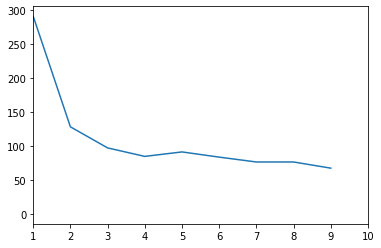

In [15]:
plt.xlim(1, 10)
plt.plot(cost)

In [27]:
k = 3
centroid = create_random_centroid(x,k)
#print(centroid)
#print(y_pred)
for i in range(0,itr):
    y_pred = point_assign_to_cluster(x,centroid,k)
    new_centroid = update_cluster_centroid(x,y_pred,k)
    if(np.array_equal(np.array(centroid), np.array(new_centroid))):
        break
    else:
        centroid = new_centroid
y_pred = y_pred.astype(int)
print(centroid)
print(y_pred)


[[5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


Text(0, 0.5, 'Petal Width')

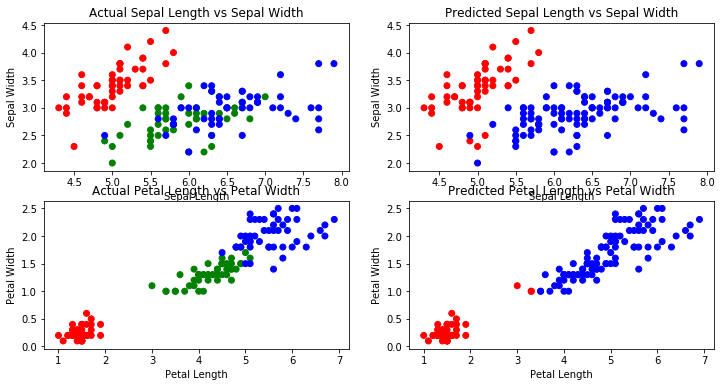

In [26]:
plt.figure(figsize=(12,6))
colors = np.array(['red', 'green', 'blue','yellow','black','purple'])
y1_ = pd.DataFrame(y_pred, columns=['Target'])
#print(y1_)

plt.subplot(2, 2, 1)
plt.scatter(x_['Sepal Length'], x_['Sepal Width'], c=colors[y_['Target']])
plt.title('Actual Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2,2,2)
plt.scatter(x_['Sepal Length'], x_['Sepal Width'], c=colors[y1_['Target']])
plt.title('Predicted Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.subplot(2,2,3)
plt.scatter(x_['Petal Length'], x_['Petal Width'], c=colors[y_['Target']])
plt.title('Actual Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2,2,4)
plt.scatter(x_['Petal Length'], x_['Petal Width'], c=colors[y1_['Target']])
plt.title('Predicted Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')